<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/AI_4_lesson/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронні мережі для класифікації

Класифікація - це фундаментальне завдання в машинному навчанні, де ми прагнемо віднести точки даних до попередньо визначених класів. Нейронні мережі чудово справляються з проблемами класифікації завдяки своїй здатності вивчати складні закономірності з даних.

Цей посібник заглиблюється в основні концепції класифікації за допомогою нейронних мереж:

# Постановка задачі

Уявіть, що вам потрібно сортувати електронні листи на "Спам" або "Вхідні", класифікувати зображення як "Кішка" або "Собака", або передбачити написані від руки цифри (0-9). Це все приклади завдань на класифікацію. Ось ключова ідея:

* У нас є **дані** з ознаками (характеристиками), які їх описують.
* У нас є заздалегідь визначені **класи** (категорії), до яких можуть належати наші дані.
* Метою моделі класифікації є вивчення відображення від ознак до класів, що дозволяє їй передбачити найбільш ймовірний клас для нової, невидимої точки даних.

![](https://www.aiperspectives.com/wp-content/uploads/2020/03/Types-of-Computer-Vision-Tasks.png)

# Прогнозування з ймовірностями

На відміну від таких завдань, як передбачення числового значення (регресія), моделі класифікації часто виводять ймовірності для кожного класу. Наприклад, модель, що класифікує зображення, може передбачити

* 70% ймовірність того, що це кіт
* 30% ймовірність того, що це собака

Цей розподіл ймовірностей показує нам рівень достовірності моделі для кожного класу. На практиці ми зазвичай вибираємо клас з найвищою ймовірністю як остаточний прогноз.


<div>
<img src=https://developers.google.com/static/machine-learning/crash-course/neural-networks/images/one_vs_one_neural_net.png
width="500"/>
</div>

# Сигмоїдна функція

Нейронні мережі в прихованих шарах зазвичай використовують функції активації, такі як ReLU, для введення нелінійності. Однак для кінцевого вихідного шару в задачах класифікації ми часто використовуємо **сигмоїдну функцію (σ)**.

Сигмоїдна функція приймає на вхід дійсне число і стискає його до значення між 0 і 1, що представляє ймовірність:


$\sigma(x) = \frac{1}{1 + e^{-x}}$

<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*JHWL_71qml0kP_Imyx4zBg.png width="500"/>
</div>


Високе значення на виході (близьке до 1) сигмоїдної функції вказує на високу ймовірність для цього класу, тоді як низьке значення (близьке до 0) вказує на низьку ймовірність.

# Функція втрат: Вимірювання помилки класифікації

Під час навчання нам потрібен спосіб виміряти, наскільки добре працює наша модель. Функція втрат обчислює різницю між передбаченнями моделі та істинними мітками. Поширеною функцією втрат для задач класифікації є **двійкова перехресна ентропія втрат** (binary cross entropy). Вона карає модель за неправильні передбачення класів.

Ось спрощене представлення (існують більш складні варіанти):

```
Loss = - y * log(σ(z)) - (1 - y) * log(1 - σ(z))
```

* де ``y`` - істинна мітка (0 або 1).
* `σ(z)` - передбачена моделлю ймовірність для позитивного класу (обчислюється за допомогою сигмоїдної функції на виході `z` з останнього шару).

Модель спрямована на мінімізацію функції втрат під час навчання шляхом налаштування її внутрішніх параметрів (ваг та зміщень) за допомогою оптимізаційних алгоритмів, таких як градієнтний спуск.

# Confusion Matrix

Матриця помилок є корисним інструментом для візуалізації ефективності класифікаційної моделі. Вона підсумовує кількість правильних і неправильних прогнозів для кожного класу.

Ось спрощений приклад матриці плутанини 2х2 для бінарної класифікації:

\begin{pmatrix}
  & {\textbf{Спрогнозований клас}} \\
  {\textbf{Справжній клас}} & \text{Кіт} & \text{Пес} \\
  Кіт & Істиннопозитивне & Хибнонегативно \\
  Пес & Хибнопозитивно & Істиннонегативне
\end{pmatrix}

* **Істиннопозитивні (ІП):** Правильно передбачені позитивні випадки.
* **Хибнопозитивні (ХП):** Неправильно передбачені позитивні випадки (помилка першого типу).
* **Хибнонегативні (ХН):** Неправильно передбачені негативні випадки (помилка другого типу).
* **Істиннонегативні (ТН):** Правильно передбачені негативні випадки.

Аналізуючи матрицю помилок, ви можете виявити потенційні упередження у вашій моделі та області для покращення.

Англомовний варіант:

\begin{pmatrix}
  & {\textbf{Predicted}} \\
  {\textbf{Actual}} & \text{Positive} & \text{Negative} \\
  Positive & True Positives (TP) & False Negatives (FN) \\
  Negative & False Positives (FP) & True Negatives (TN)
\end{pmatrix}

# Метрики

Кілька метрик допомагають оцінити ефективність моделі класифікації:

## **Точність:**
Загальний відсоток правильно класифікованих точок даних.


$$
Accuracy = \frac{TP + TN}{Загальна\, кількість\, даних}
$$

## **Precision:**
Вимірює частку позитивних прогнозів, які насправді є правильними (з усіх прогнозованих позитивних прогнозів).

$$
Precision = \frac{TP}{TP + FP}
$$

## **Recall:**
Вимірює частку фактичних позитивних випадків, які були правильно ідентифіковані (з усіх фактичних позитивних випадків).


$$
Recall = \frac{TP}{TP + FN}
$$


## **F1-Score:**
Гармонійне середнє значення precission та recall, що поєднує їхні сильні сторони.

$$
F1\text{-}Score = \frac{2 * Recall * Precision} {Recall + Precision}
$$

## ROC-крива та AUC

ROC-крива (Receiver Operating Characteristic Curve) і AUC (Area Under the ROC Curve) є важливими інструментами для оцінки ефективності моделей бінарної класифікації. Вони дають уявлення про те, наскільки добре модель розрізняє позитивні та негативні класи.

**ROC-крива:**

* **Візуалізація:** ROC-крива - це графічне представлення, яке відкладає **Частку істинно позитивних результатів (TPR)** на осі y проти **Частки хибнопозитивних результатів (FPR)** на осі x.

  * **Частка істинно-позитивних результатів (ЧІПР):** Також відома як "нагадування", вона показує частку фактичних позитивних випадків, які модель правильно класифікувала.

    ```
    TPR = TP / (TP + FN)
    ```

  * **Частка хибнопозитивних результатів (FPR):** Відображає частку негативних випадків, які модель помилково класифікувала як позитивні.

    ```
    FPR = FP / (TN + FP)
    ```
<div>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/800px-Roc_curve.svg.png width="500"/>
</div>

* **Тлумачення:** Ідеальною ROC-кривою для ідеального класифікатора буде діагональна лінія, що починається з лівого нижнього кута (0 FPR, 0 TPR) і досягає лівого верхнього кута (0 FPR, 1 TPR), перш ніж продовжиться горизонтально до правого верхнього кута (1 FPR, 1 TPR). Це свідчить про те, що модель чудово розділяє позитивні та негативні класи.

  * Чим ближче крива ROC до цієї ідеальної діагоналі, тим краще модель розрізняє класи.
  * Крива, яка занурюється в нижній лівий кут, свідчить про низьку ефективність, оскільки модель намагається розрізнити класи.

**AUC(Area Under Curve)**.

* **Узагальнююча метрика:** AUC - метрика, яка дорівнює площі під ROC-кривою. Воно представляє ймовірність того, що модель оцінить випадково вибраний позитивний екземпляр вище, ніж випадково вибраний негативний екземпляр.

**Тлумачення:** * Більш високе значення AUC вказує на те, що модель класифікує більше позитивних екземплярів, ніж негативних.

  * Вище значення AUC вказує на кращу продуктивність. AUC, що дорівнює 1, означає ідеальний класифікатор, тоді як AUC, що дорівнює 0,5, еквівалентний випадковому вгадуванню.

**Переваги ROC-кривої та AUC:**

* **Незалежність від класу:** ROC-криві та AUC не залежать від розподілу класів у даних. Це робить їх придатними для незбалансованих наборів даних, де один клас може мати значно менше зразків, ніж інший.
* **Візуалізація:** ROC-криві забезпечують візуальне представлення продуктивності моделі при різних порогах класифікації. Це дозволяє побачити, як поводиться модель, коли ви змінюєте поріг для класифікації примірника як позитивного.
* **Вибір порогу:** Аналізуючи ROC-криву, ви можете вибрати відповідний поріг класифікації на основі компромісу між TPR і FPR, який найкраще підходить для вашої конкретної програми. Наприклад, якщо правильна ідентифікація позитивних випадків має вирішальне значення (наприклад, діагностика захворювань), ви можете віддати перевагу вищій TPR, навіть якщо це призведе до дещо вищої FPR.

#  Імпорт бібліотек

In [35]:
import torch
import pandas as pd

torch.manual_seed(0)

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
#torch.set_default_device(device)

# Створення Dataset

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Airline%20Passenger%20Satisfaction.csv",
                 usecols=['Ease of Online booking', 'Inflight wifi service', 'Food and drink', 'Seat comfort', 'satisfaction']
                 )

df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df.head()

,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,satisfaction
0,5,3,3,3,1
1,1,3,5,5,1
2,2,2,2,2,0
3,0,0,3,4,1
4,2,4,4,2,1


In [37]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values)
      self.y = torch.FloatTensor(y.values)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

dataset = MyDataset(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

dataset_train = MyDataset(X_train, y_train)
dataset_test = MyDataset(X_test, y_test)

* Створюємо Dataset даних з ознаками `X` та відповідними цільовими значеннями `y`.
* Клас `MyDataset` успадковується від `torch.utils.data.Dataset` і визначає методи доступу до даних.
* `__len__` повертає розмір набору даних.
* `__getitem__` повертає вибірку даних (ознаки та ціль) за певним індексом.

# Створення DataLoader

In [39]:
from torch.utils.data import DataLoader

batch_size = 128
train_dl = DataLoader(dataset_train,  # датасет з даними
                      batch_size=batch_size,  # кількість даних в одному пакеті
                      shuffle=True,          # чи треба перемішувати дані
                      )

test_dl = DataLoader(dataset_test,  # датасет з даними
                     batch_size=batch_size,  # кількість даних в одному пакеті
                     shuffle=True,          # чи треба перемішувати дані
                     )

* `DataLoader` керує пакетним завантаженням та перемішуванням набору даних під час навчання.
* ``batch_size`` задає кількість вибірок, що обробляються разом у кожній ітерації.
* `shuffle=True` рандомізує порядок зразків у кожній епосі (навчальній ітерації).

# Створення моделі

In [40]:
import numpy as np
from torch import nn
import torch.nn.functional as F


class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear3 = nn.Linear(hidden_dim//2, output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.relu(out)

        out = self.linear3(out)
        out = F.sigmoid(out)

        return out

    def predict(self, X, device='cpu'):
        X = torch.FloatTensor(X.values).to(device)

        with torch.no_grad():
            y_pred = self.forward(X)

        return y_pred.cpu().numpy()


model = BinaryClassifier(4, 100, 1)
model = model.to(device)

model

BinaryClassifier(
  (linear1): Linear(in_features=4, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=1, bias=True)
)

Перевіряємо розмірності

In [41]:
from torchsummary import summary

summary(model, input_size=(4,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]             500
            Linear-2                   [-1, 50]           5,050
            Linear-3                    [-1, 1]              51
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


# Визначення функції втрат та оптимізатора

In [42]:
# Функція втрат середньоквадратичної помилки (BCE) для регресії
loss_fn = nn.BCELoss()

# Оптимізатор (SGD) для оновлення ваг моделі
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

* Визначаємо функцію втрат як `nn.MSELoss`, яка підходить для задач регресії (вимірює середньоквадратичну різницю між прогнозами та цілями).
* Вибираємо оптимізатор градієнтного спуску (`torch.optim.SGD`) для налаштування ваг моделей під час навчання.
* Швидкість навчання (`lr=0.01`) контролює розмір кроку оптимізатора.

# Цикл навчання

In [43]:
# @title Функція для тренування
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [44]:
from sklearn.metrics import accuracy_score, recall_score

history = train(model, optimizer, loss_fn, train_dl, test_dl,
                epochs=20,
                metrics=[accuracy_score, recall_score],
                device=device,
                task='binary')


train() called: model=BinaryClassifier, opt=SGD(lr=0.010000), epochs=20, device=cpu

Epoch    1    1sec	loss:      0.685	val_loss:      0.675	accuracy_score:        0.6	val_accuracy_score:      0.651	recall_score:      0.413	val_recall_score:        0.8	
Epoch    2    1sec	loss:      0.667	val_loss:      0.659	accuracy_score:      0.679	val_accuracy_score:      0.642	recall_score:      0.577	val_recall_score:       0.29	
Epoch    3    1sec	loss:       0.65	val_loss:       0.64	accuracy_score:       0.69	val_accuracy_score:      0.698	recall_score:      0.575	val_recall_score:      0.552	
Epoch    4    2sec	loss:      0.633	val_loss:      0.623	accuracy_score:        0.7	val_accuracy_score:      0.708	recall_score:      0.613	val_recall_score:      0.656	
Epoch    5    2sec	loss:      0.617	val_loss:      0.608	accuracy_score:      0.704	val_accuracy_score:       0.68	recall_score:      0.627	val_recall_score:      0.737	
Epoch    6    1sec	loss:        0.6	val_loss:       0.59	accuracy

## Графіки

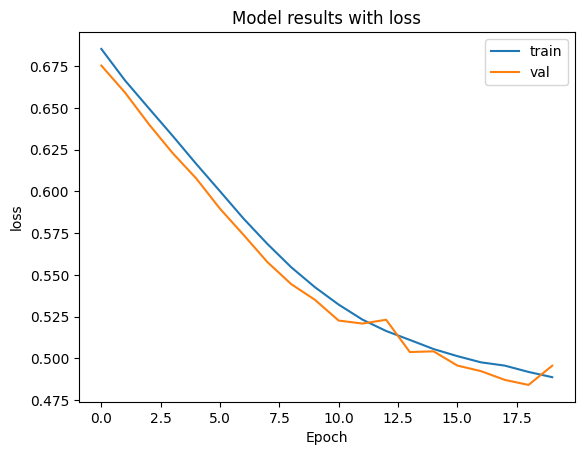

In [45]:
import matplotlib.pyplot as plt

def plot_metric(history, name):
  plt.title(f"Model results with {name}")
  plt.plot(history[name], label='train')
  plt.plot(history['val_'+name], label='val')
  plt.xlabel('Epoch')
  plt.ylabel(name)
  plt.legend()


plot_metric(history, 'loss')

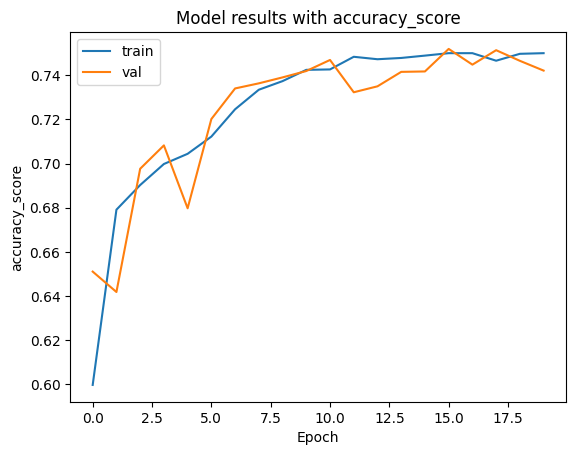

In [46]:
plot_metric(history, 'accuracy_score')

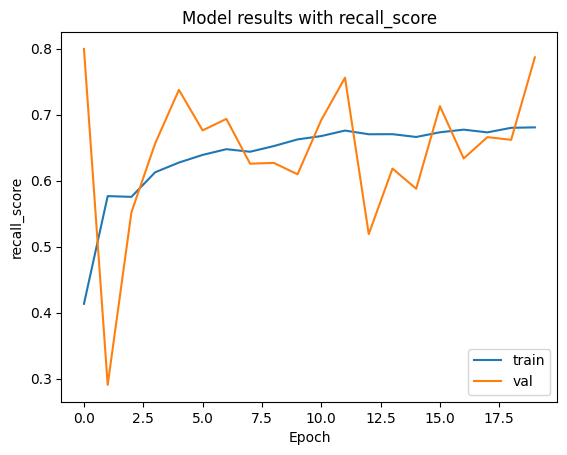

In [47]:
plot_metric(history, 'recall_score')

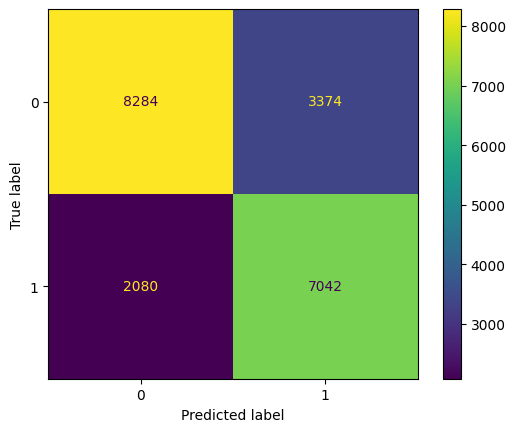

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

y_pred = model.predict(X_train, device=device)

y_pred.round()

ConfusionMatrixDisplay.from_predictions(y_train, y_pred.round())

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred.round())

print(report)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     11658
           1       0.68      0.77      0.72      9122

    accuracy                           0.74     20780
   macro avg       0.74      0.74      0.74     20780
weighted avg       0.75      0.74      0.74     20780



In [50]:
(y_train == 0).sum()

11658